### Sales_Data_Analytics_Project

In [ ]:
pip install pandas numpy matplotlib seaborn openpyxl scikit-learn statsmodels

### Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


### Load and Preview Data

In [36]:
# Load dataset
df = pd.read_excel('sales_data.xlsx')
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df.head()



,Date,Product_ID,Region,Store_ID,Sales,TV_Ads,Radio_Ads,Online_Ads,Discount,Returns,Customer_Rating,Payment_Type,Category,Stock_Level,Weekday,Month
0,2021-01-01,P415,South,S35,1584,2547,138,5809,0.20,40,4.5,UPI,Electronics,383,Wednesday,2021-01
1,2021-01-01,P211,South,S39,9032,1767,308,4937,0.38,81,4.8,Net Banking,Clothing,286,Tuesday,2021-01
2,2021-01-01,P615,North,S75,5510,4157,2937,5985,0.22,76,2.1,UPI,Grocery,69,Wednesday,2021-01
3,2021-01-01,P603,East,S46,4235,4833,622,3753,0.26,98,2.2,Net Banking,Electronics,155,Sunday,2021-01
4,2021-01-01,P407,West,S90,575,1532,945,3439,0.45,16,1.9,UPI,Furniture,16,Thursday,2021-01


### Data Cleaning and Preparation

In [37]:
# Drop missing values
df.dropna(inplace=True)

# Convert Date and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')


### Total Sales by Region

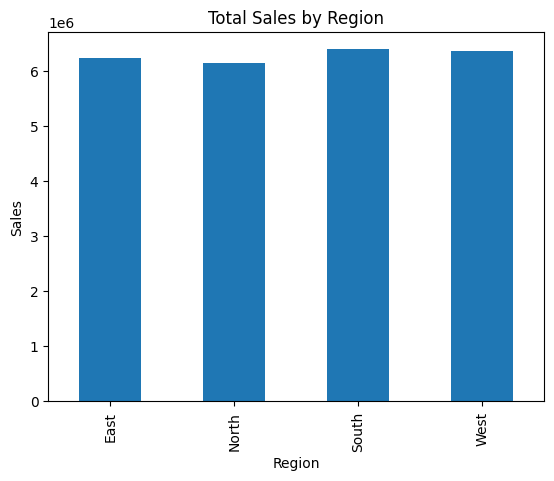

In [38]:
### Which region generates the most revenue?


region_sales = df.groupby("Region")["Sales"].sum()
region_sales.plot(kind="bar", title="Total Sales by Region", ylabel="Sales")
plt.show()


### Monthly Sales Trend

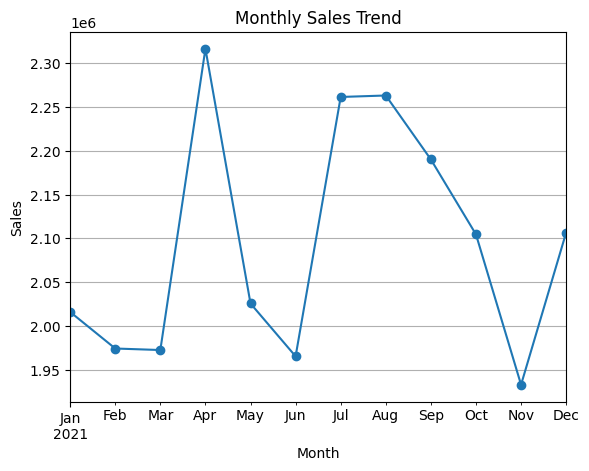

In [39]:
### How have total sales changed month-over-month?

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales.plot(kind="line", marker='o', title="Monthly Sales Trend", ylabel="Sales")
plt.grid()
plt.show()


### Correlation Heatmap

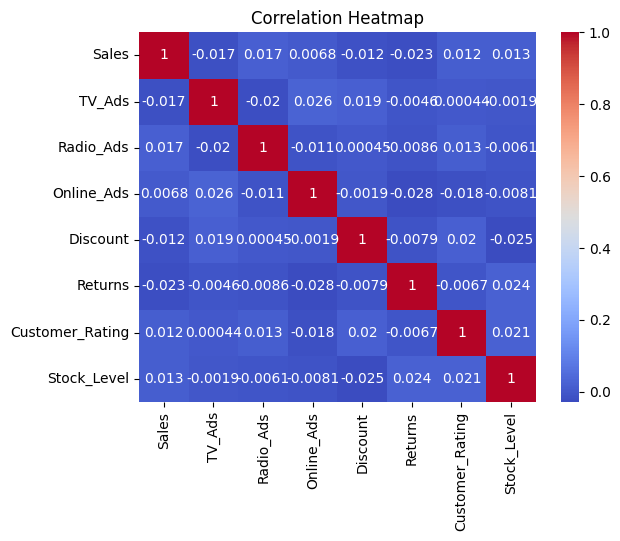

In [40]:
## Are there any correlations between numerical features (like Sales & Quantity)?

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Advanced Visualizations with Seaborn

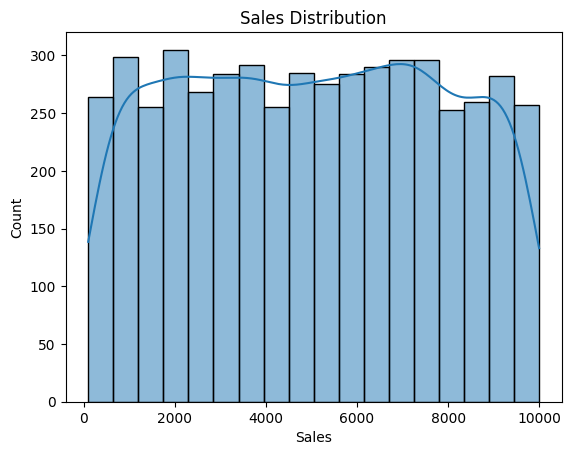

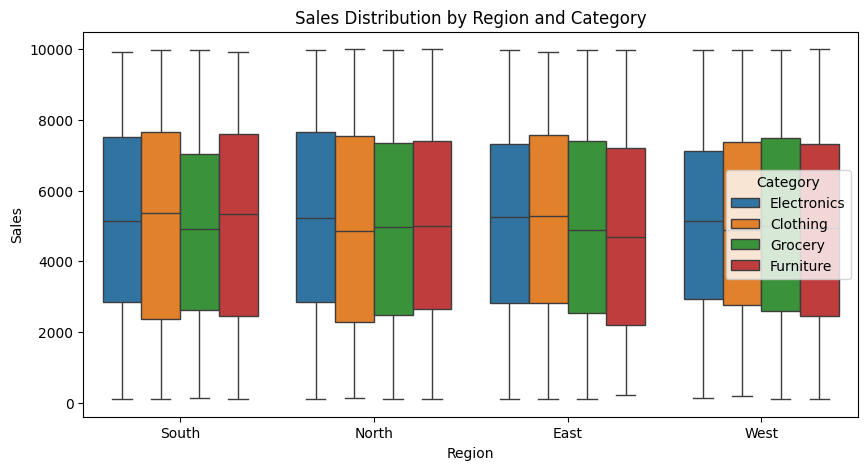

In [41]:
## What is the overall distribution of sales?

sns.histplot(df["Sales"], kde=True)
plt.title("Sales Distribution")
plt.show()


## How does sales vary across regions and categories?

plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="Sales", hue="Category", data=df)
plt.title("Sales Distribution by Region and Category")
plt.show()


###  Forecasting with Linear Regression

In [42]:
# Forecasting
monthly_df = df.groupby("Month")["Sales"].sum().reset_index()
monthly_df['Month_Num'] = np.arange(len(monthly_df))

X = monthly_df[['Month_Num']]
y = monthly_df['Sales']
model = LinearRegression()
model.fit(X, y)

# Predict future sales
future_X = pd.DataFrame({'Month_Num': np.arange(len(monthly_df), len(monthly_df) + 6)})
future_pred = model.predict(future_X)
future_months = pd.period_range(monthly_df['Month'].iloc[-1] + 1, periods=6, freq='M')

# to see the predictions as a table
forecast_df = pd.DataFrame({
    'Forecast_Month': future_months.astype(str),
    'Predicted_Sales': future_pred
})

forecast_df  # This will display the forecasted sales


,Forecast_Month,Predicted_Sales
0,2022-01,2.137920e+06
1,2022-02,2.144653e+06
2,2022-03,2.151386e+06
3,2022-04,2.158119e+06
4,2022-05,2.164852e+06
5,2022-06,2.171585e+06


###  Visualize Forecast

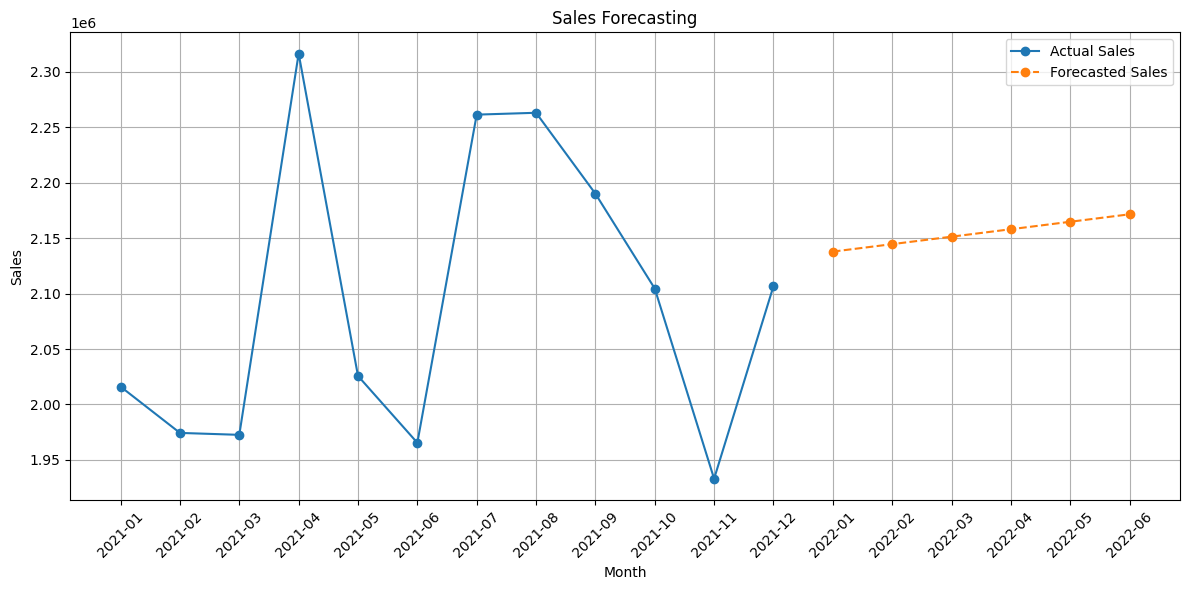

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_df["Month"].astype(str), y, marker='o', label="Actual Sales")
plt.plot(future_months.astype(str), future_pred, marker='o', linestyle='--', label="Forecasted Sales")
plt.title("Sales Forecasting")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_forecast_plot.png")
plt.show()


### Pie Chart– Sales Contribution by Category

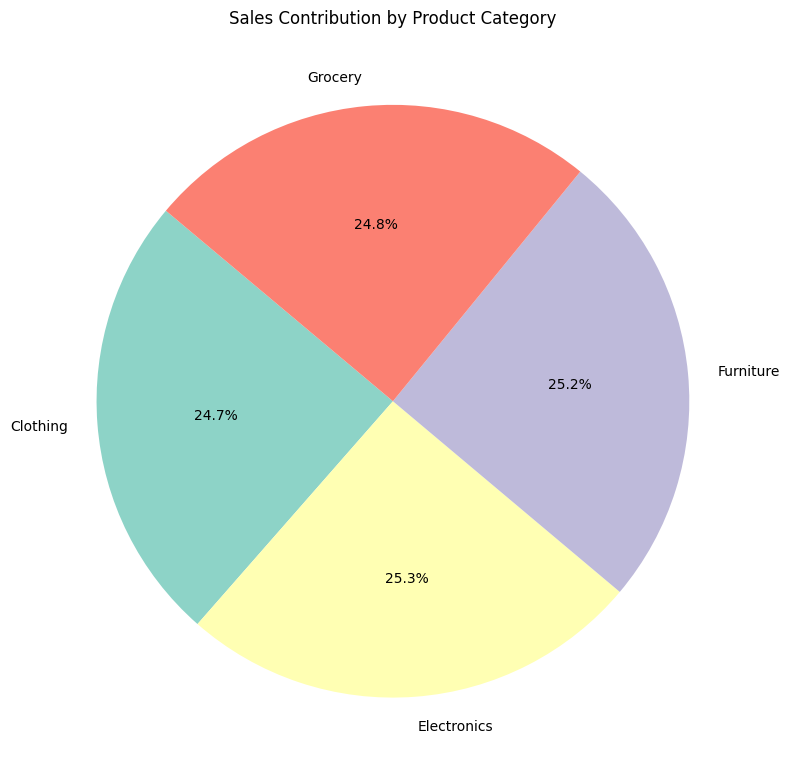

In [44]:
## What percentage of total sales comes from each product category?

import pandas as pd
import matplotlib.pyplot as plt

# Group sales by category
category_sales = df.groupby('Category')['Sales'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales,
        labels=category_sales.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)

plt.title('Sales Contribution by Product Category')
plt.axis('equal')  # circle
plt.tight_layout()
plt.show()


### Donut Chart – Region-wise Sales Split

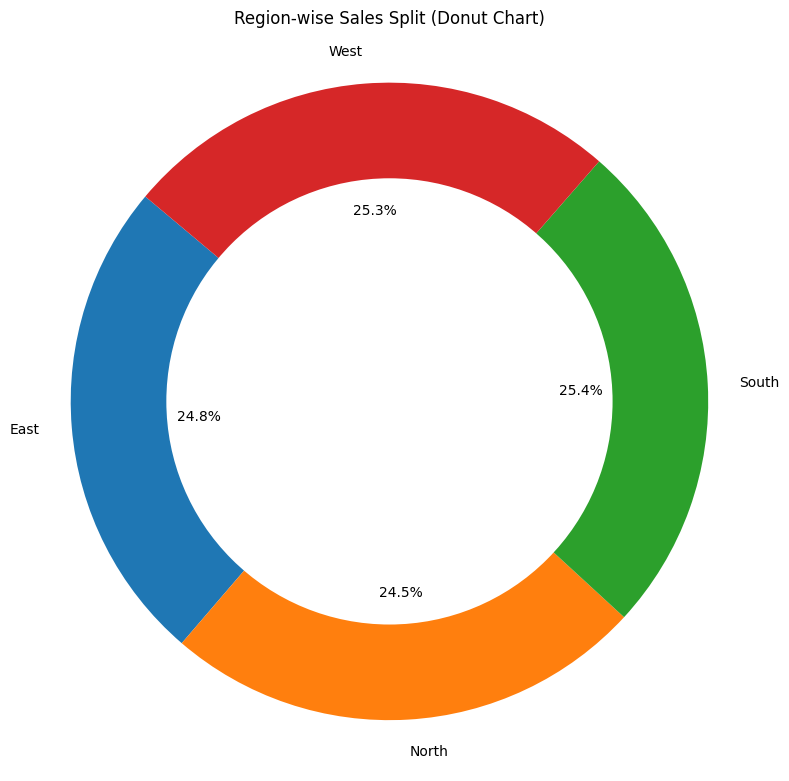

In [45]:
##  What is the region-wise contribution to total sales?                     

region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Region-wise Sales Split (Donut Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Monthly Sales Growth Rate

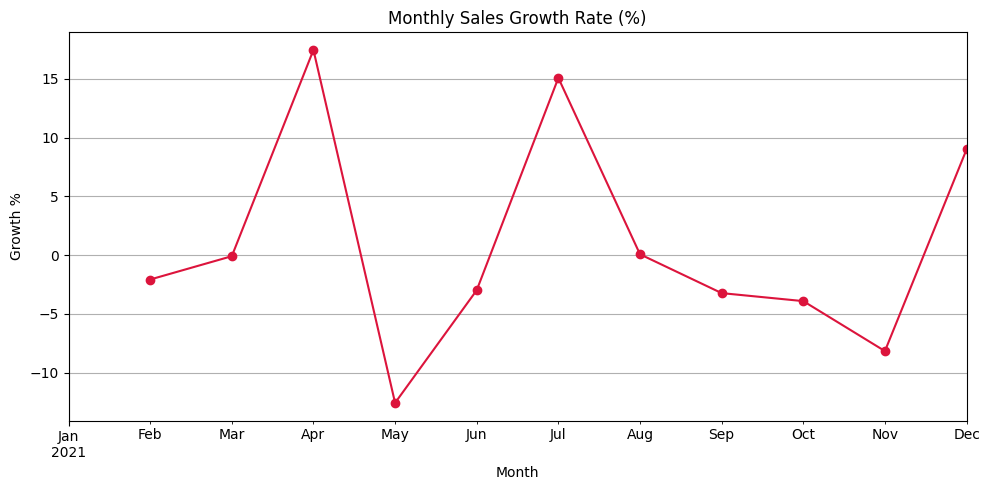

In [46]:
## What is the month-over-month sales growth rate?  

df['Month'] = pd.to_datetime(df['Month'].astype(str))
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_growth = monthly_sales.pct_change() * 100

plt.figure(figsize=(10, 5))
monthly_growth.plot(marker='o', color='crimson')
plt.title('Monthly Sales Growth Rate (%)')
plt.xlabel('Month')
plt.ylabel('Growth %')
plt.grid(True)
plt.tight_layout()
plt.show()


### Sales by Weekday

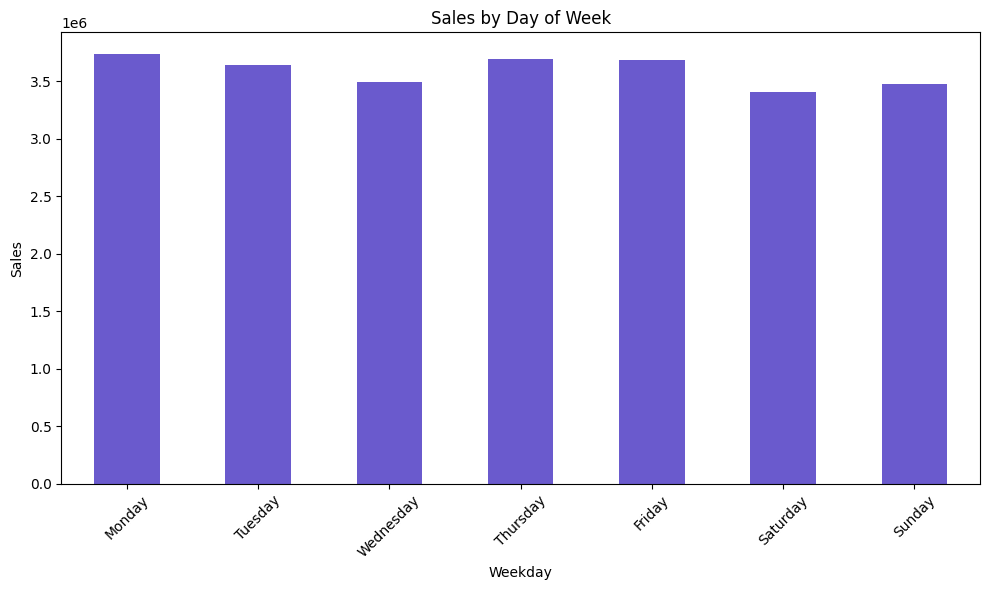

In [47]:
## On which day of the week are most purchases made? 

weekday_sales = df.groupby('Weekday')['Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='slateblue')
plt.title('Sales by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pair Plot – Ads, Sales, and Rating

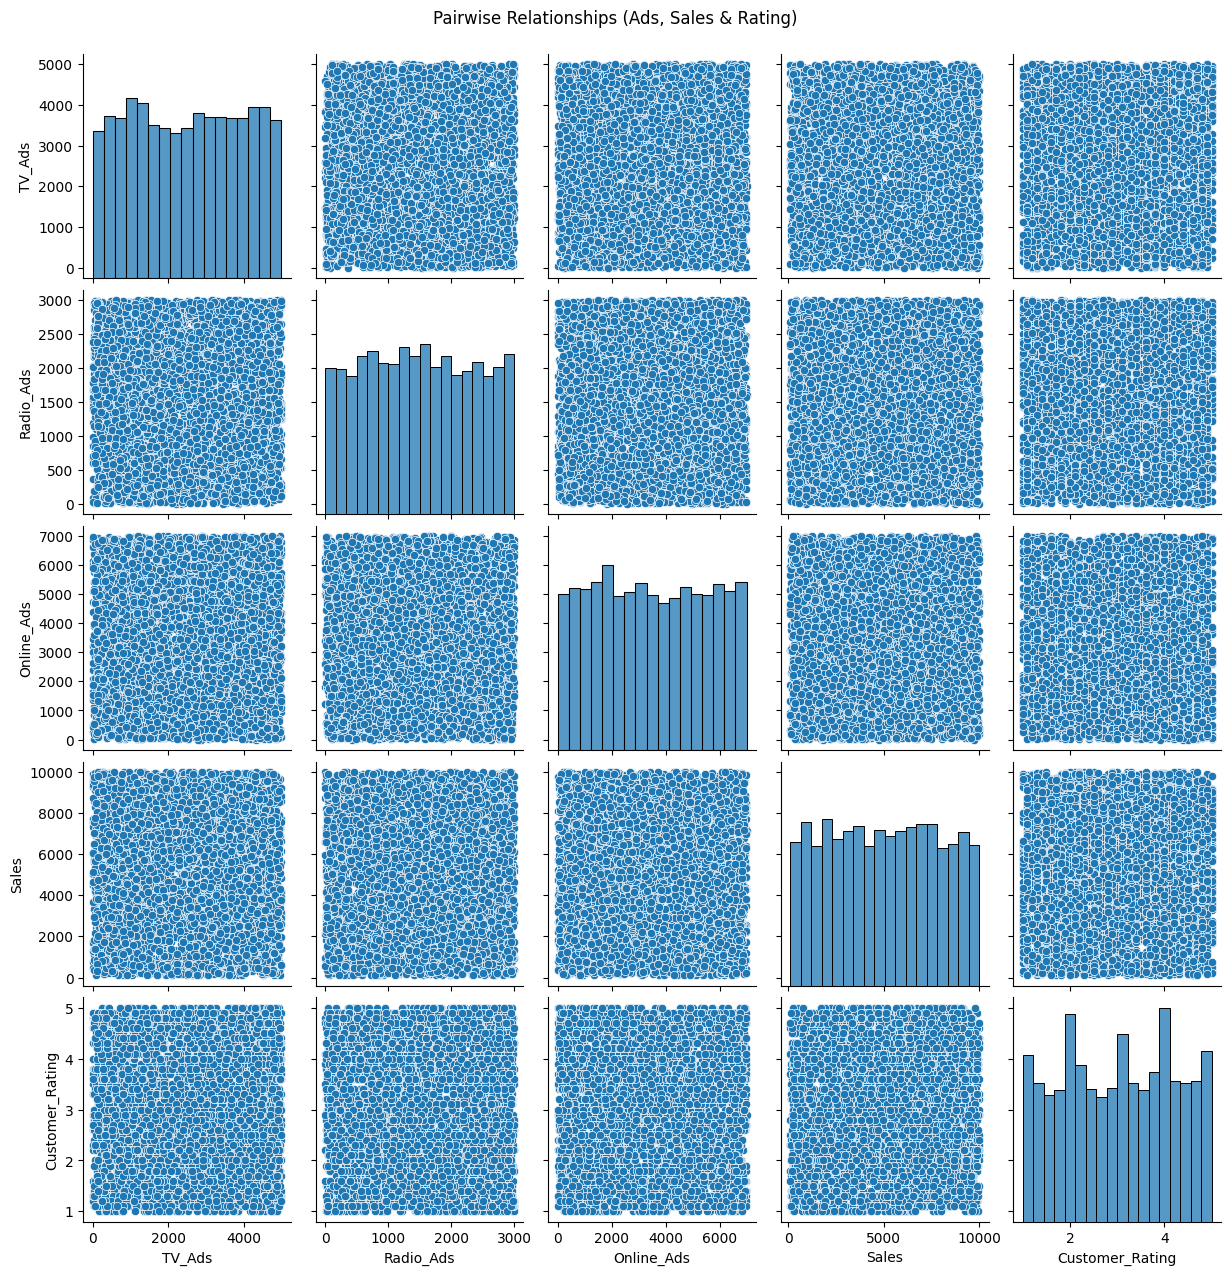

In [48]:
## What are the relationships between ads, sales, and customer ratings?

import seaborn as sns

sns.pairplot(df[['TV_Ads', 'Radio_Ads', 'Online_Ads', 'Sales', 'Customer_Rating']])
plt.suptitle('Pairwise Relationships (Ads, Sales & Rating)', y=1.02)
plt.show()


### Cumulative Sales Growth Over Time

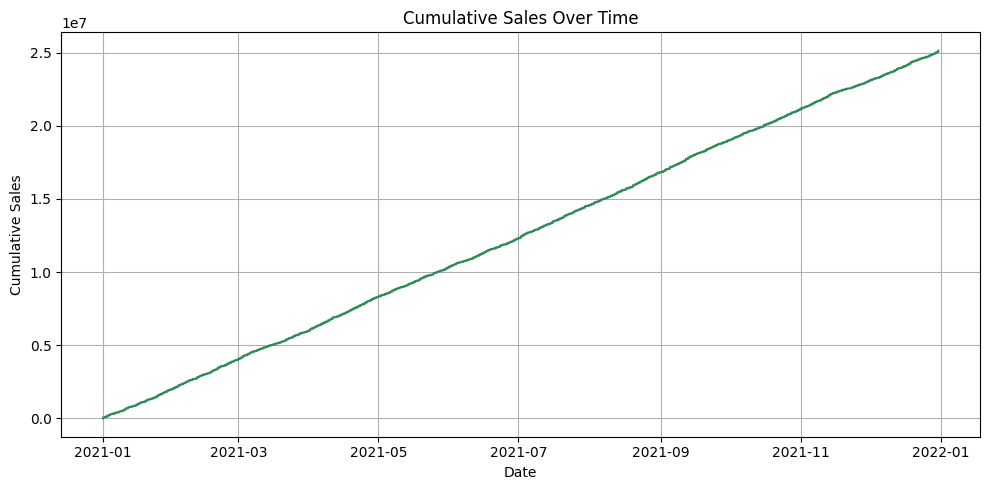

In [49]:
## How has revenue grown cumulatively over time? 

df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
df_sorted['Cumulative Sales'] = df_sorted['Sales'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Cumulative Sales'], color='seagreen')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Conclusion :-

This project demonstrates a comprehensive analysis of sales data using Python and modern data science tools. We began by cleaning and preparing the data, followed by a thorough exploration of various business dimensions such as region, category, product, and time-based trends.

Through 9+ distinct patterns using **Matplotlib, Seaborn, and NumPy,** we extracted valuable insights that serve as a foundation for better strategic decisions. For instance:

1. Regional analysis highlighted top-performing and underperforming sales territories.

2. Category and product trends offered guidance on inventory and promotional strategies.

3. Monthly sales forecasting using linear regression helped predict future revenue and plan ahead.

**These findings empower business stakeholders to:**

1. Focus on high-contributing regions and categories.

2. Recognize underperforming areas that require attention.

3. Forecast future sales for inventory planning, budget allocation, and marketing strategy.

4. Make data-driven decisions rather than relying on assumptions.

In summary,**this project showcases how data analytics can turn raw data into actionable insights and help drive business growth through informed forecasting and visual storytelling. With the proper integration of data science, businesses can reduce risk, maximize opportunities, and align operations with market demands.**
